In [ ]:
Q1. Clustering is a technique in machine learning and data analysis that involves grouping similar 
data points together based on their characteristics or proximity. The goal of clustering is to 
discover inherent patterns, structures, or relationships in the data without any prior knowledge 
of the groups or classes. The basic concept of clustering involves partitioning the data into subsets
called clusters, where objects within the same cluster are more similar to each other than to those
in other clusters.

Clustering finds applications in various domains, such as:
Customer Segmentation: Grouping customers based on their purchase history, demographics, or behavior
to target specific marketing strategies.
Image Segmentation: Separating regions or objects in images based on their visual features.
Document Clustering: Organizing large document collections into groups based on their content, 
aiding in information retrieval and document organization.
Anomaly Detection: Identifying outliers or unusual patterns in a dataset by clustering normal data
points and considering the remaining points as anomalies.
Social Network Analysis: Identifying communities or groups of individuals with similar interests
or connections in social networks.

Q2. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based 
clustering algorithm that groups data points based on their density and connectivity.
It differs from other clustering algorithms like k-means and hierarchical clustering in several ways:
DBSCAN does not require the number of clusters to be specified beforehand, unlike k-means.
DBSCAN can discover clusters of arbitrary shape, whereas k-means typically assumes convex-shaped clusters.
DBSCAN can handle noisy data points and outliers effectively.
DBSCAN uses density-based concepts (density reachability and density connectivity) to define 
clusters rather than distance-based measures used by k-means.
DBSCAN does not rely on centroid computation or distance thresholds, making it more robust to
variations in cluster sizes and densities.

Q3. The two key parameters in DBSCAN are epsilon (ε) and the minimum points (MinPts) required 
to form a dense region. Determining optimal values for these parameters depends on the dataset
and the desired clustering results. Here are some common approaches:
Epsilon (ε): The epsilon parameter determines the maximum distance between two points for them
to be considered neighbors. One way to determine its value is by using the k-distance plot, 
which plots the distance to the kth nearest neighbor for each point in the dataset. 
The value of ε can be set at the knee point or elbow of the plot, where a significant increase
in distance occurs.
Minimum Points (MinPts): The MinPts parameter specifies the minimum number of neighboring points 
within a distance of ε for a point to be considered a core point. It is typically set based on
domain knowledge or by analyzing the distribution of points in the k-distance plot. 
Higher MinPts values result in more conservative clustering.
Parameter tuning may require experimentation and iterative evaluation to find the most appropriate
values for a specific dataset.

Q4. DBSCAN clustering handles outliers naturally as noise points. Outliers that do not satisfy 
the density conditions to be core points or directly reachable from core points are considered 
noise points and are not assigned to any cluster. Noise points are not part of any cluster and 
do not affect the formation of clusters by DBSCAN.

Q5. DBSCAN clustering differs from k-means clustering in several aspects:
Cluster Shape: DBSCAN can discover clusters of arbitrary shape, while k-means assumes convex-shaped clusters
Number of Clusters: DBSCAN does not require specifying the number of clusters in advance, whereas 
k-means clustering requires the user to define the number of clusters.
Outlier Handling: DBSCAN can handle outliers and noise points effectively by designating them as 
separate clusters or noise points, while k-means does not explicitly handle outliers.
Parameter Sensitivity: DBSCAN is less sensitive to the initial parameter settings compared to k-means
In k-means, the choice of the initial centroids can affect the final clustering result, whereas
DBSCAN is less sensitive to the initial selection of parameters like epsilon and MinPts.

Q6. Yes, DBSCAN clustering can be applied to datasets with high-dimensional feature spaces. However, there
are some potential challenges:
Curse of Dimensionality: As the number of dimensions increases, the density becomes more uniform, making
it difficult to identify dense regions. This can lead to either an overestimation or underestimation
of cluster densities.
Distance Metric Selection: Choosing an appropriate distance metric in high-dimensional spaces is crucial.
Euclidean distance, which is commonly used in DBSCAN, may not be effective in high dimensions due to
the "curse of dimensionality." Other distance metrics like cosine similarity or Manhattan distance can 
be considered.
Dimensionality Reduction: Applying dimensionality reduction techniques, such as PCA (Principal 
Component Analysis) or t-SNE (t-Distributed Stochastic Neighbor Embedding), can be beneficial to 
visualize and preprocess the data before applying DBSCAN.
Feature Selection: Selecting relevant features and eliminating irrelevant or noisy features can
help improve the clustering results and mitigate the curse of dimensionality.

Q7. DBSCAN clustering can handle clusters with varying densities effectively. It identifies dense 
regions based on the density reachability and density connectivity concepts. DBSCAN can discover 
clusters of different sizes and shapes without being influenced by the density variations
in the dataset. It can capture both dense and sparse regions, allowing it to adapt to varying densities.

Q8. Some common evaluation metrics used to assess the quality of DBSCAN clustering results include:
Silhouette Coefficient: Measures the cohesion and separation of clusters, ranging from -1 to 1. Higher
values indicate better-defined clusters.
Davies-Bouldin Index: Quantifies the cluster separation and compactness. Lower values indicate
better clustering quality.
Calinski-Harabasz Index: Measures the ratio of between-cluster dispersion to within-cluster
dispersion. Higher values represent better-defined clusters.
Cluster Purity: Evaluates the similarity between clusters and ground truth labels, applicable
for datasets with known class labels.
The choice of evaluation metric depends on the specific characteristics of the dataset and the 
desired goals of the clustering task.

Q9. DBSCAN clustering is primarily an unsupervised learning algorithm. However, it can be used in
semi-supervised learning tasks by combining it with other techniques. One approach is to assign
the known labeled points as core points, allowing DBSCAN to propagate the labels to their
reachable neighbors. This way, DBSCAN can utilize the labeled data to guide the clustering process
and assign labels to the unlabeled data.

Q10. DBSCAN clustering can handle datasets with noise or missing values effectively. It treats
outliers and noisy points as separate clusters or noise points. When it encounters missing
values, DBSCAN can still perform clustering based on the available features or dimensions, as long
as the density-based relationships can be established


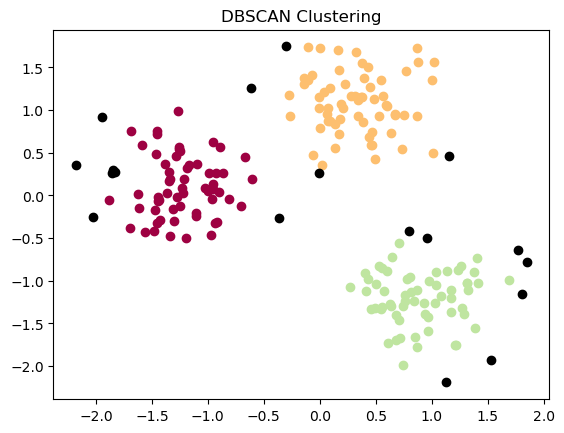

In [3]:
# Q11 ---->
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Generate sample dataset
X, y = make_blobs(n_samples=200, centers=3, cluster_std=0.6, random_state=0)

# Scale the features
X = StandardScaler().fit_transform(X)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Get cluster labels and the number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Plotting the clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black color for outliers/noise points

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o')

plt.title('DBSCAN Clustering')
plt.show()
